# Mushroom Classification

## 1. Importa-se as bibliotecas e os pacotes necessários.

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## 2. Carrega-se o dataset

O *dataset* está disponível em https://archive.ics.uci.edu/ml/datasets/Mushroom. <br>
Atribui-se à variável df o *dataset* 'agaricus-lepiota.data' com a função *read_csv()* e adiciona-se o cabeçalho com os nomes dos atributos. <br>
A função *head()* mostra as primeiras 5 linhas do *dataset*.

In [2]:
df = pd.read_csv('agaricus-lepiota.data', names = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 3. Informações sobre os atributos

Apresenta-se o significado de cada letra utilizada no *dataset* em cada um dos atributos.

classes: edible = e, poisonous = p

cap-shape: bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s

cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s

cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y

bruises: yes = t, no = f

odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s

gill-attachment: attached = a, descending = d, free = f, notched = n

gill-spacing: close = c, crowded = w, distant = d

gill-size: broad = b, narrow = n

gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y

stalk-shape: enlarging = e, tapering = t

stalk-root: bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?

stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s

stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s

stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

veil-type: partial = p, universal = u

veil-color: brown = n, orange = o, white = w, yellow = y

ring-number: none = n, one = o, two = t

ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z

spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y

population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y

habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

## 4. Análise dos dados

Utilizou-se a função *shape()* para mostrar o tamanho do *dataset*.

In [3]:
df.shape

(8124, 23)

Existem 23 características e 8124 amostras.

Verificou-se se existia valores em falta.

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Não existem valores em falta.

Visualiza-se informação sobre as colunas e o seu *data type*.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Observa-se que as 23 colunas não são nulas e que o *datatype* de todas as colunas é *object*.

Visualiza-se uma descrição das colunas do *dataset*.<br>
*Count* que conta quantos valores existem na coluna, *unique* que mostra quantos valores únicos existem na coluna, *top* mostra o maior valor categórico e a *freq* que conta quantas vezes o maior valor categórico aparece na coluna.

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Fez-se um *count* de cada tipo de cogumelos.

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Existem 4208 *edible* (comestíveis) e 3916 *poisonous* (venenosos).

Existem apenas *missing values* no atributo 'stalk-root'.

In [8]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Verificou-se quantos valores *missing* existem na coluna.

In [9]:
(df.iloc[:,11] == '?').sum()

2480

Dado o grande número de *missing values* no atributo stalk-root, decidiu-se remover o atributo.

In [10]:
df = df.drop('stalk-root', axis=1)

### Gráfico Cogumelos Venenosos vs. Comestíveis

Criou-se uma palette de cores que são utilizadas nos gráficos.

In [11]:
sns.set_palette(['#4682B4','#8246B4'])

Visualiza-se num gráfico de barras o número de cogumelos venenosos vs. cogumelos comestíveis.

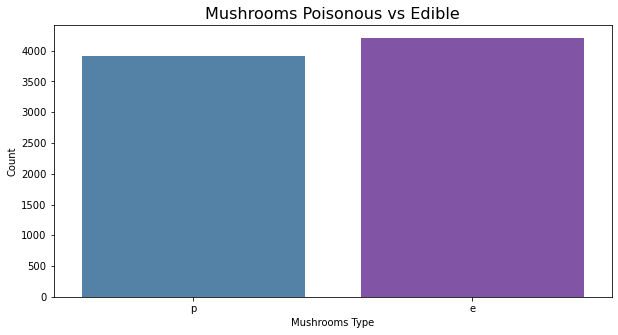

In [12]:
plt.figure(figsize = (10,5))
plt.title('Mushrooms Poisonous vs Edible', fontsize = "16")
sns.countplot(x = 'class', data = df)
plt.xlabel('Mushrooms Type')
plt.ylabel('Count')
plt.show()

Observa-se que os cogumelos estão bem distribuidos pelos dois tipos, existem 4208 comestíveis (*Edible*) e 3916 venenosos (*Poisonous*).

Transformação dos valores não-numéricos para valores numéricos. <br>
É utilizado a função *LabelEncoder()* para transformar os dados em valores númericos. <br>
Aplica-se a função *fit_transform()* a todas as colunas do *dataset*. <br>
Mostra-se as 5 primeiras linhas do *dataset* com os valores númericos.

In [13]:
le = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Observou-se as correlações entre os atributos.

In [14]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Utilizou-se agora um *heatmap* para ver as correlações entre todas as variáveis.

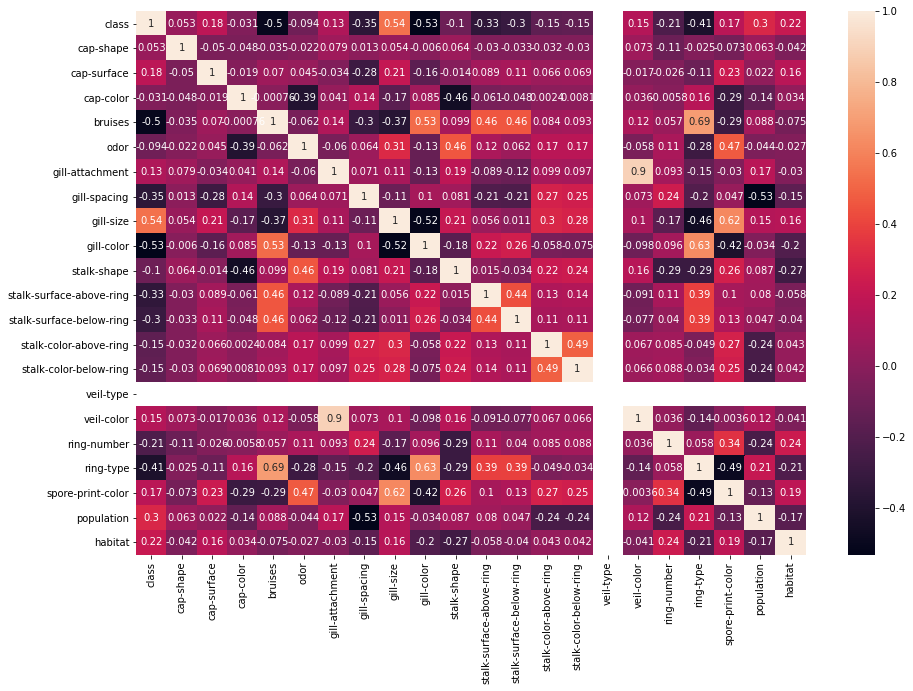

In [15]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(), annot=True)
sns_plot.figure.savefig('output.png')

Observa-se no *heatmap* que não existe praticamente nenhuma correlação entre os atributos e que a *veil-type* tem o mesmo valor em todas, o que não contribui em nada, por isso pode ser removida.

## 5. Preparação dos dados

A coluna 'veil-type' tem toda o mesmo valor (0).

In [16]:
df['veil-type'].sum()

0

Atribui-se à variável x todas as colunas (*features*) exceto a coluna 'class' (que queremos prever) e a 'veil-type' que tem toda o mesmo valor. <br>
Atribui-se à variável y a coluna *target* 'class'.

In [17]:
x = df.drop(['class','veil-type'], axis=1)
y = df['class']

Divide-se em *arrays* as variáveis x e y, onde o teste vai conter 25% dos dados de treino, atribui-se um número a este teste.<br>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## 6. Classificação dos dados

## 6.1 Regressão Logística

É um modelo que permite a previsão de valores categóricos.

In [19]:
lr = LogisticRegression(solver="lbfgs", max_iter=500).fit(x_train, y_train)

print("A accuracy do treino da regressão logística é:", round(lr.score(x_train, y_train),2))
print("A accuracy do teste da regressão logística é:", round(lr.score(x_test, y_test),2))

A accuracy do treino da regressão logística é: 0.95
A accuracy do teste da regressão logística é: 0.95


Ajustou-se o conjunto de dados de treino com o modelo de Regressão Logística. <br>
Apresenta-se as *accuracies* obtidas para os dados de treino e de teste. <br>
Ambos os valores das *accuracies* são 0.95 o que indica que os dados estão muito bem ajustados.

In [20]:
y_pred_rl = lr.predict(x_test)

Atribui-se à variável y_pred_rl a previsão do x_test com a Regressão Logística.

In [21]:
print("A accuracy da regressão logística é:", round(accuracy_score(y_test, y_pred_rl),2))

A accuracy da regressão logística é: 0.95


Verificou-se a *accuracy* da regressão logística que é 0.95, muito próxima de 1 o que é um excelente resultado.

Text(0.5, 15.0, 'Predicted label')

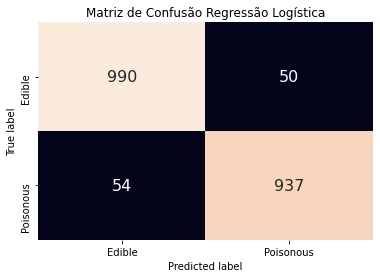

In [22]:
cm_rl=confusion_matrix(y_test, y_pred_rl)
sns.heatmap(cm_rl, annot = True, cbar = None, xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"], fmt="d", annot_kws={"size": 16})
plt.title('Matriz de Confusão Regressão Logística')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Visualizou-se a confusion_matrix para analisar os falsos positivos/negativos e os verdadeiros positivos/negativos.

Utiliza-se o classification_report para visualizar as pontuações de precisão que dão suporte ao modelo.

In [23]:
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



## 6.2 KNN 

É um método que pode ser utilizado para classificação.<br>
Utilizou-se dois *arrays* para guardar os valores da *accuracy* para cada um dos n_neighbors de 1 a 10. <br>
Atribui-se à variável clf o classificador KNeighbors e ajusta-se o *array* ao modelo.

In [24]:
precisao_treino = []
precisao_teste = []

neighbors_settings = range(1, 11)
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train,y_train)
    precisao_treino.append(clf.score(x_train, y_train))
    precisao_teste.append(clf.score(x_test, y_test))   
y_pred_knn = clf.predict(x_test)

Mostra-se num *plot* a variação das *accuracies* à medida que se aumenta o número de neighbors.

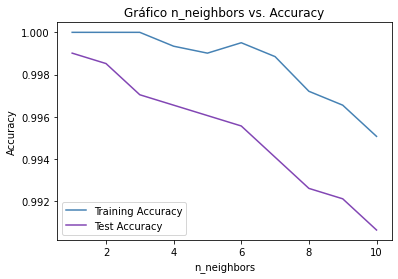

In [46]:
plt.plot(neighbors_settings, precisao_treino, label="Training Accuracy")
plt.plot(neighbors_settings, precisao_teste, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title("Gráfico n_neighbors vs. Accuracy")
plt.savefig('KNN.png')

Pode-se dizer que os resultados obtidos para cada um dos n_neighbors têm uma ótima *accuracy*, o que mostra que os dados podem estar demasiado ajustados ao modelo (*overfitting*), mesmo quando o n_neighbors é igual a 10.

Text(0.5, 15.0, 'Predicted label')

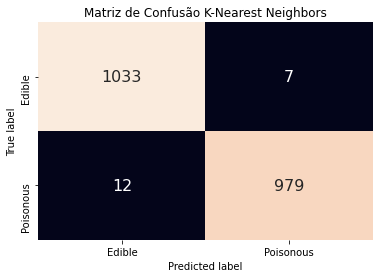

In [26]:
cm_knn=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot = True, cbar = None, xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"], fmt="d", annot_kws={"size": 16})
plt.title('Matriz de Confusão K-Nearest Neighbors')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Visualizou-se a confusion_matrix para analisar os falsos positivos/negativos e os verdadeiros positivos/negativos.

In [27]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1040
           1       0.99      0.99      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



Utiliza-se o classification_report para visualizar as pontuações de precisão que dão suporte ao modelo.<br>
Para n_neighbors = 10 obtemos uma *accuracy* de 0.99, ligeiramente inferior à inicial mas continua com *overfitting*.

## 6.3 Redes Neuronais

Atribuir à variável clf o classificador de percetrões multicamadas com a função de ativação *logistic*, com 1000 iterações e ajusta-se o *array* ao modelo.

In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, activation='relu', max_iter=1000).fit(x_train, y_train)

In [29]:
print("O score do treino do classificador Redes Neuronais é:", round(clf.score(x_train, y_train),2))
print("O score do teste do classificador Redes Neuronais é:", round(clf.score(x_test, y_test),2))

O score do treino do classificador Redes Neuronais é: 1.0
O score do teste do classificador Redes Neuronais é: 1.0


In [30]:
y_pred_rn = clf.predict(x_test)

Atribui-se à variável y_pred_rn a previsão do x_test com o MLP.

In [31]:
print("A accuracy do classificador MLP é:", round(accuracy_score(y_test, y_pred_rn),2))

A accuracy do classificador MLP é: 1.0


A *accuracy* é 1.0 o que pode indicar que o modelo está muito ajustado aos dados.

Text(0.5, 15.0, 'Predicted label')

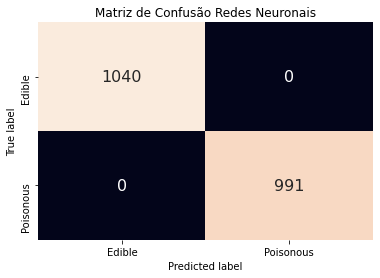

In [32]:
cm_rn=confusion_matrix(y_test, y_pred_rn)
sns.heatmap(cm_rn, annot = True, cbar = None, xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"], fmt="d", annot_kws={"size": 16})
plt.title('Matriz de Confusão Redes Neuronais')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Verifica-se pela confusion_matrix que o modelo está muito ajustado aos dados, existe apenas verdadeiros positivos e verdadeiros negativos.

In [33]:
print(classification_report(y_test, y_pred_rn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Utiliza-se o classification_report para visualizar as pontuações de precisão que dão suporte ao modelo.

## 6.4 Árvore de Decisão

É um método popular de classificação, ideal para suportar tomadas de decisão.

Utiliza-se o classificador *DecisionTree* e ajusta-se aos dados de treino.

In [34]:
dtc = DecisionTreeClassifier() 
dtc.fit(x_train, y_train) 
y_pred_dtc = dtc.predict(x_test) 
print("O score do treino do classificador DecisionTree é:", round(dtc.score(x_train, y_train),2))
print("O score do teste do classificador DecisionTree é:", round(dtc.score(x_test, y_test),2))
print("A accuracy do classificador Árvore de Decisão é:", round(accuracy_score(y_test, y_pred_dtc),2))

O score do treino do classificador DecisionTree é: 1.0
O score do teste do classificador DecisionTree é: 1.0
A accuracy do classificador Árvore de Decisão é: 1.0


A *accuracy* é 1.0 o que pode indicar que o modelo está muito ajustado aos dados.

Apresenta-se a árvore de decisão no formato png, é utilizado o *gini index* para dividir, a separação é perfeita quando o *gini* for 0.

In [35]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file='tree.dot', feature_names=x.columns,
                rounded = True, proportion = False, 
                 precision = 2,filled = True)


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


from IPython.display import Image
Image(filename = 'tree.png')

Text(0.5, 15.0, 'Predicted label')

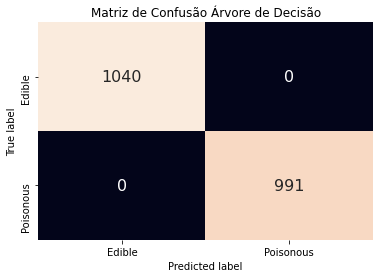

In [36]:
cm_dtc=confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot = True, cbar = None, xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"], fmt="d", annot_kws={"size": 16})
plt.title('Matriz de Confusão Árvore de Decisão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Verifica-se pela confusion_matrix que o modelo está muito ajustado aos dados, existe apenas verdadeiros positivos e verdadeiros negativos.

In [37]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Utiliza-se o classification_report para visualizar as pontuações de precisão que dão suporte ao modelo.

## 6.5 Random Forest

Random Forest é um modelo de *ensemble* para classificação. 

Divide-se em 10 dobras usando o KFold.<br>
Atribui-se à variável rfc o classificador RandomForest para 100 árvores, removeu-se a impureza quando o gini < 0.05 e ajusta-se o modelo aos dados de treino.

In [38]:
kfold_rf = KFold(n_splits=10)
rfc = RandomForestClassifier(n_estimators = 100, min_impurity_decrease=0.05)
rfc.fit(x_train, y_train)
print("O score do treino do classificador Random Forest é:", round(rfc.score(x_train, y_train),2))
print("O score do teste do classificador Random Forest é:", round(rfc.score(x_test, y_test),2))
results_rf = model_selection.cross_val_score(rfc, x_train,y_train, cv=kfold_rf)
print("A accuracy do classificador Random Forest é:", round(results_rf.mean(), 2))
y_pred_rfc = rfc.predict(x_test) 

O score do treino do classificador Random Forest é: 0.93
O score do teste do classificador Random Forest é: 0.93
A accuracy do classificador Random Forest é: 0.93


A *accuracy* é 1.0 o que pode indicar que o modelo está muito ajustado aos dados.

Text(0.5, 15.0, 'Predicted label')

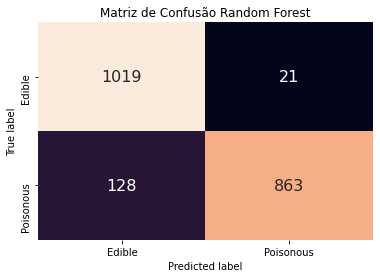

In [39]:
cm_rf=confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rf, annot = True, cbar = None,xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"], fmt="d", annot_kws={"size": 16})
plt.title('Matriz de Confusão Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Verifica-se pela confusion_matrix que o modelo está muito ajustado aos dados, existe apenas verdadeiros positivos e verdadeiros negativos.

In [40]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1040
           1       0.98      0.87      0.92       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



É de se esperar esta *accuracy*, pois é um método que procura pela melhor árvore.

## 6.6 Naive Bayes

Naive Bayes é um método usado para classificação.

Atribui-se à variável nb o classificador GaussianNB e ajusta-se o modelo aos dados de treino.

In [41]:
nb = GaussianNB() 
nb.fit(x_train, y_train) 
print("O score do treino do classificador Naive Bayes é:", round(nb.score(x_train, y_train),2))
print("O score do teste do classificador Naive Bayes é:", round(nb.score(x_test, y_test),2))
y_pred_nb = nb.predict(x_test) 
print("A accuracy do modelo Gaussian Naive Bayes é:", round(accuracy_score(y_test, y_pred_nb),2))

O score do treino do classificador Naive Bayes é: 0.92
O score do teste do classificador Naive Bayes é: 0.93
A accuracy do modelo Gaussian Naive Bayes é: 0.93


Os valores de *accuracy* dos dados de treino estão muito próximos dos dados de teste, 0.92 e 0.93 respetivamente, é excelente.

Text(0.5, 15.0, 'Predicted label')

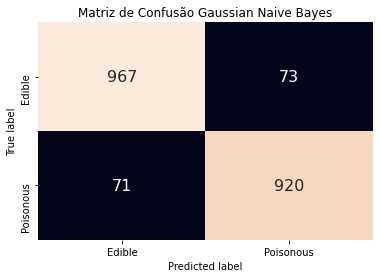

In [42]:
cm_nb=confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot = True, cbar = None, xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"], fmt="d", annot_kws={"size": 16})
plt.title('Matriz de Confusão Gaussian Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Visualizou-se a confusion_matrix para analisar os falsos positivos/negativos e os verdadeiros positivos/negativos.

Utiliza-se o classification_report para visualizar as pontuações de precisão que dão suporte ao modelo.

In [43]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1040
           1       0.93      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



## 7. Discussão de Resultados

<div style="text-align: justify">  
Após uma análise de todos os modelos implementados para a classificação do conjunto de dados, chegou-se à conclusão de que o modelo que se adequa mais para a classificação do nosso dataset é o modelo de Regressão Logística, pois a sua accuracy é de 95%, e como alternativa a este utilizaríamos o modelo de Random Forest (93%) ou o de Naive Bayes (de accuracy 93%).
Os restantes modelos apresentaram um overfitting, isto é, estavam demasiado ajustados aos dados de treino, pois apresentaram todos uma accuracy de 100% tendo só o KNN uma accuracy de 99% (também se encontra demasiado ajustado aos dados de treino).
Ou seja estes modelos que apresentam overfiting, se lhes apresentar um novo dataset a sua accuracy irá baixar significativamente e fazer previsões incorretas.
</div>

## 8. Apreciações Finais

Este trabalho teve como objetivo selecionar qual o melhor modelo para classificar o conjunto de dados, para o encontrar testou-se os vários modelos e verificou-se qual o que se adequa melhor neste caso. Foi importante para colocar em prática os conceitos abordados nas aulas.